In [2]:
import sys
sys.path.insert(1, '..')

from models import Atlas
import simulator
import visualizations

%load_ext autoreload
%autoreload 2

/mnt/home/anejatbakhsh/anaconda3/envs/statatlas/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
bodypart = 'tail'
n_samples = 10

In [5]:
# Load the pre-trained atlas
atlas = simulator.loat_atlas( 
    '../data/atlas_xx_rgb.mat',
    bodypart
)

In [6]:
# Simulate worms from the generative model
ims = simulator.simulate_gmm(
    atlas,
    n_samples=n_samples
)

In [7]:
# Train atlas on the sample worms
atlas_obj = Atlas(epsilon=[.1,.1])
trained_atlas, aligned, params, _, _ = atlas_obj.train_atlas(
    ims,
    bodypart,
    n_iter=100
)

Positon cost: 639.22, Color cost: 659.10: 100%|██████████| 100/100 [00:05<00:00, 18.33it/s]


In [8]:
# Align the major axis for visualization
trained_atlas, aligned, params = visualizations.major_axis_align(
    trained_atlas, 
    aligned, 
    params, 
    shift=10
)


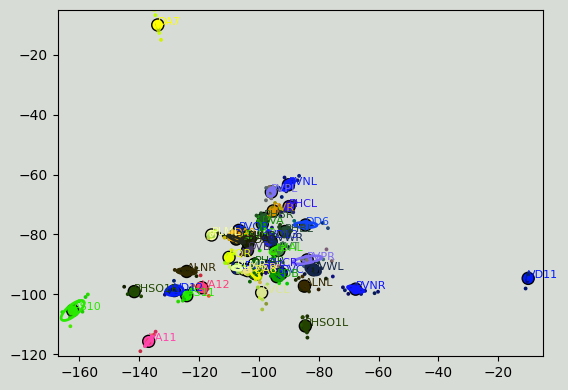

In [9]:
# Visualize atlas and aligned point clouds
visualizations.visualize_pretty(trained_atlas,aligned,'')